# 주택 판매 가격 예측

SalePrice - 부동산 판매 가격(달러)입니다. 이것이 예측하려는 목표 변수입니다.  
MSSubClass : 건물 클래스  
MSZoning : 일반적인 구역 분류  
LotFrontage : 부동산과 연결된 거리의 선형 피트  
LotArea : 부지 크기(평방피트)  
Street : 도로 접근 유형  
Alley : 골목 접근 방식  
LotShape : 부동산의 일반적인 형태  
LandContour : 대지의 평탄도  
유틸리티 : 사용 가능한 유틸리티 종류  
LotConfig : 로트 구성  
LandSlope : 토지의 경사  
인근 지역 : Ames 시 경계 내의 물리적 위치  
조건 1 : 주요 도로 또는 철도에 근접함  
조건 2 : 주요 도로 또는 철도에 근접함(두 번째가 있는 경우)  
BldgType : 주거 유형  
HouseStyle : 주거 스타일  
전반적인 품질(OverallQual) : 전체적인 재질 및 마감 품질  
GeneralCond : 전반적인 상태 등급  
YearBuilt : 원래 건설 날짜  
YearRemodAdd : 리모델링 날짜  
RoofStyle : 지붕 유형  
RoofMatl : 지붕재  
Exterior1st : 주택 외부 피복재  
Exterior2nd : 집의 외부 덮개(재료가 두 개 이상인 경우)  
MasVnrType : 조적 베니어 유형  
MasVnrArea : 석조 베니어 면적(평방 피트)  
ExterQual : 외장재 품질  
ExterCond : 외부 재질의 현재 상태  
기초 : 기초의 종류  
BsmtQual : 지하실 높이  
BsmtCond : 지하실의 일반상태  
BsmtExposure : 산책 또는 정원 수준 지하 벽  
BsmtFinType1 : 지하 마감면적의 품질  
BsmtFinSF1 : 유형 1 마감 평방피트  
BsmtFinType2 : 두 번째 완성된 영역의 품질(있는 경우)  
BsmtFinSF2 : 유형 2 마감 평방피트  
BsmtUnfSF : 지하실의 미완성 평방피트  
TotalBsmtSF : 지하 면적의 총 평방피트  
난방 : 난방방식  
HeatingQC : 가열 품질 및 상태  
CentralAir : 중앙 에어컨  
전기 : 전기 시스템  
1stFlrSF : 1층 평방피트  
2ndFlrSF : 2층 평방 피트  
LowQualFinSF : 낮은 품질로 마감된 평방 피트(모든 층)  
GrLivArea : 지상(지상) 생활 면적 평방 피트  
BsmtFullBath : 지하 욕실  
BsmtHalfBath : 지하 반욕실  
FullBath : 1층 이상 욕실 완비  
HalfBath : 지상층 이상의 반욕실  
침실 : 지하층 이상 침실 수  
주방 : 주방 개수  
KitchenQual : 주방 품질  
TotRmsAbvGrd : 1층 위의 총 객실 수(욕실은 포함되지 않음)  
기능성 : 홈 기능성 평가  
벽난로 : 벽난로 수  
FireplaceQu : 벽난로 품질  
GarageType : 차고 위치  
GarageYrBlt : 차고가 건설된 연도  
GarageFinish : 차고 내부 마감  
GarageCars : 자동차 수용 능력에 따른 차고 크기  
GarageArea : 차고의 크기(평방피트)  
GarageQual : 차고 품질  
GarageCond : 차고 상태  
PavedDrive : 포장된 진입로  
WoodDeckSF : 목재 데크 면적(평방피트)  
OpenPorchSF : 개방형 현관 면적(평방피트)  
EnclosedPorch : 닫힌 현관 면적(평방피트)  
3SsnPorch : 3계절 현관 면적(제곱피트)  
ScreenPorch : 스크린 현관 면적(평방피트)  
PoolArea : 수영장 면적(평방피트)  
PoolQC : 수영장 품질  
울타리 : 울타리 품질  
MiscFeature : 다른 카테고리에서 다루지 않는 기타 기능  
MiscVal : 기타 기능의 $Value  
MoSold : 판매월  
YrSold : 판매된 연도  
SaleType : 판매 유형  
SaleCondition : 판매 조건  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv]
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
fc-cache: invalid option -- ']'
usage: fc-cache [-EfrsvVh] [-y SYSROOT] [--error-on-no-fonts] [--force|--really-force] [--sysroot=SYSROOT] [--system-only] [--verbose] [--version] [--help] [dirs]
Build font information caches in [dirs]
(all directories in font configuration by default).

  -E, --error-on-no-fonts  raise an error if no fonts in a directory
  -f, --force              scan directories with apparently valid caches
  -r, --really-force       erase all existing caches, then rescan
  -s, --system-only        scan system-wide directories only
  -y, --sysroot=SYSROOT    prepend SYSROOT to all paths for scanning
  -v, --verbose            display status information while busy
  -V, --version            display font config version and exit
  -h, --help               d

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'

## 데이터 불러오기

In [ ]:
# 드라이브 사용 설정
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 데이터 로드

train=pd.read_csv('/content/drive/MyDrive/house/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/content/drive/MyDrive/house/house-prices-advanced-regression-techniques/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/house/house-prices-advanced-regression-techniques/sample_submission.csv')

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [ ]:
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


## 데이터 전처리

In [ ]:
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

### 왜도

In [ ]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<Axes: xlabel='SalePrice', ylabel='Count'>

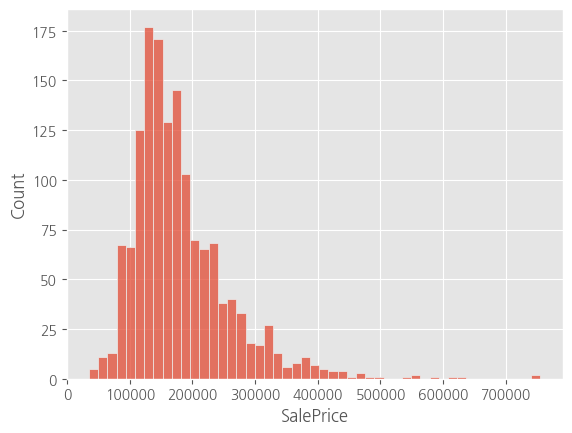

In [ ]:
sns.histplot(train['SalePrice'])

In [ ]:
# 왜도 값

train['SalePrice'].skew()

1.8828757597682129

#### 로그 변환

왼쪽으로 치우쳐있으며 오른쪽으로 긴 꼬리  
부정적인 영향을 줄이기 위해 로그 변환 : 데이터의 범위를 줄이고, 이상치의 영향을 줄이며, 데이터의 분포를 더 정규 분포 형태로 만든다

왜도가 1.88에서 0.12로 0에 가까운 왜도를 갖는다

In [ ]:
y = np.log1p(train['SalePrice'])
y.skew()

0.12134661989685333

<Axes: xlabel='SalePrice', ylabel='Count'>

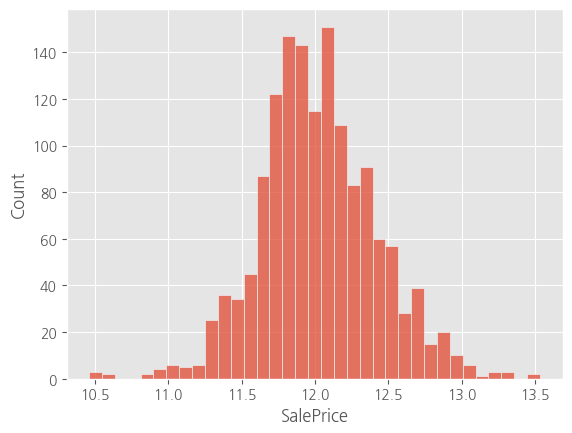

In [ ]:
sns.histplot(y)

In [ ]:
train["SalePrice"] = np.log1p(train['SalePrice'])

### 결측치 제거

train, test를 합쳐서 결측치를 제거하여 일관성 유지하기

In [ ]:
train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [ ]:
train_features = train.drop(['SalePrice'], axis=1)

In [ ]:
features = pd.concat([train_features, test],ignore_index=True)

In [ ]:
features

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

범주형인데 숫자로 되어있는 변수 - 별로 그룹화

MSSubClass, MoSold, YrSold판매년도

In [ ]:
features['MSSubClass'] = features['MSSubClass'].apply(str)
features['YrSold'] = features['YrSold'].astype(str)
features['MoSold'] = features['MoSold'].astype(str)

MSZoning

MSSubClass: 범주형

In [ ]:
features[features['MSZoning'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1915,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,Inside,...,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal
2216,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml
2250,70,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
2904,20,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal


In [ ]:
features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

LotFrontage    

In [ ]:
features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

Alley

In [ ]:
features.dropna(subset=['Alley'])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
21,45,RM,57.0,7449,Pave,Grvl,Reg,Bnk,AllPub,Inside,...,0,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal
30,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal
56,160,FV,24.0,2645,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2009,WD,Abnorml
79,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,Corner,...,0,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal
87,160,FV,40.0,3951,Pave,Pave,Reg,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,6,2009,New,Partial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,20,RM,65.0,9750,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,Gar2,4500,7,2006,WD,Normal
2795,30,RL,50.0,11672,Pave,Pave,IR2,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
2797,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,210,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml
2870,50,RL,45.0,8248,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,COD,Abnorml


In [ ]:
from scipy.stats import chi2_contingency

table = pd.crosstab(features['Alley'], features['LotShape'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(table)

print(f"Chi2: {chi2}, p-value: {p}")

Chi2: 23.680753784368243, p-value: 2.912228021021979e-05


- 범주형 변수를 카이제곱 검정해본 결과, p값이 0.05보다 작으므로 연관성이 있다고 판단

In [ ]:
features.groupby('LotShape')['Alley'].value_counts()

LotShape  Alley
IR1       Pave      20
          Grvl       7
IR2       Pave       4
IR3       Grvl       1
Reg       Grvl     112
          Pave      54
Name: count, dtype: int64

In [ ]:
features['Alley'] = features.groupby('LotShape')['Alley'].transform(lambda x: x.fillna(x.mode()[0]))

결측값이 별로없는 범주형 최빈값

In [ ]:
features['Utilities'].value_counts()

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [ ]:
d = ['Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType','Electrical']

for i in d:
    features[i].fillna(features[i].mode()[0], inplace=True)

나머지는 숫자면 0, 문자면 Na로 채우기

그 행은 대부분 nan값이 많거나 0으로 처리하는 게 맞기 때문

In [ ]:
features[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']][features['BsmtHalfBath'].isnull()]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
2120,NaN,NaN,NaN,NaN,NaN,NaN
2188,0.0,0.0,0.0,0.0,NaN,NaN


In [ ]:
features[['GarageCars','GarageArea','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']][features['GarageYrBlt'].isnull()]

,GarageCars,GarageArea,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
39,0.0,0.0,NaN,NaN,NaN,NaN,NaN
48,0.0,0.0,NaN,NaN,NaN,NaN,NaN
78,0.0,0.0,NaN,NaN,NaN,NaN,NaN
88,0.0,0.0,NaN,NaN,NaN,NaN,NaN
89,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2893,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2909,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2913,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2914,0.0,0.0,NaN,NaN,NaN,NaN,NaN


#### 숫자형 결측값 0으로 처리, 범주형 결측값 NA로 처리하기

In [ ]:
for i in features.columns:
    if features[i].dtype == object:
        features[i].fillna('NA', inplace=True)
    else:
        features[i].fillna(0, inplace=True)

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

## 피쳐엔지니어링

### 범주형 데이터 상관관계 - 제거 여부

In [ ]:
import scipy.stats as spst

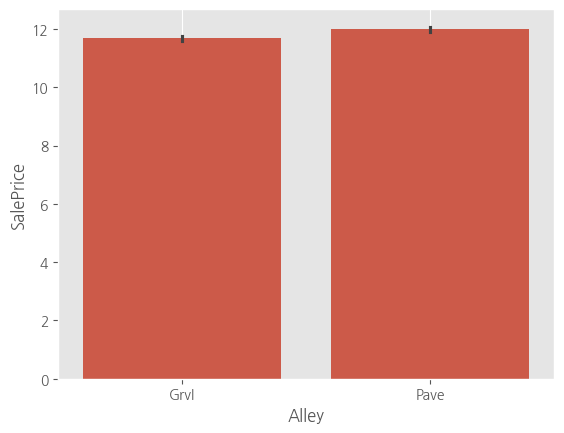

In [ ]:
sns.barplot(x="Alley", y="SalePrice", data=train)
plt.grid()
plt.show()

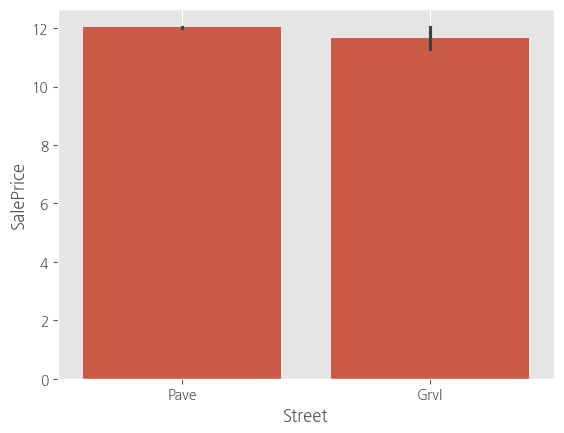

In [ ]:
sns.barplot(x="Street", y="SalePrice", data=train)
plt.grid()
plt.show()

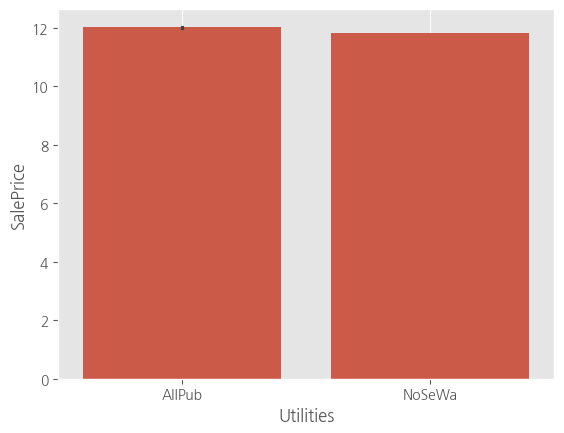

In [ ]:
sns.barplot(x="Utilities", y="SalePrice", data=train)
plt.grid()
plt.show()

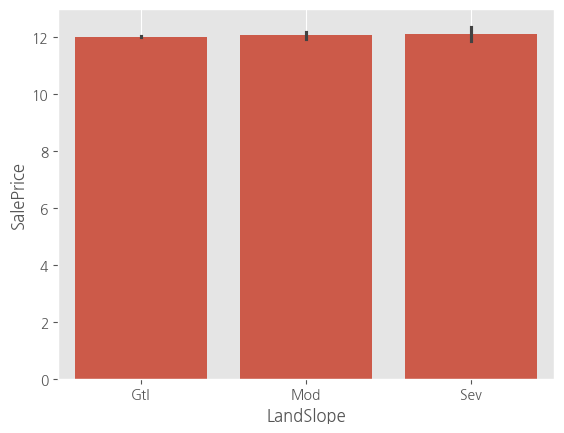

In [ ]:
sns.barplot(x="LandSlope", y="SalePrice", data=train)
plt.grid()
plt.show()

In [ ]:
temp = train.loc[train['SalePrice'].notnull()]
# 그룹별 저장
P_1 = temp.loc[temp.Alley == 'Grvl', 'SalePrice']
P_2 = temp.loc[temp.Alley == 'Pave', 'SalePrice']

In [ ]:
spst.f_oneway(P_1, P_2)

# 유의미하다

F_onewayResult(statistic=27.007530111278424, pvalue=1.2770679752740598e-06)

In [ ]:
temp = train.loc[train['SalePrice'].notnull()]
# 그룹별 저장
P_1 = temp.loc[temp.Street == 'Grvl', 'SalePrice']
P_2 = temp.loc[temp.Street == 'Pave', 'SalePrice']

spst.f_oneway(P_1, P_2)

# 유의미하지 않다고 판단 - 제거

F_onewayResult(statistic=4.814434444770553, pvalue=0.028379646829017106)

In [ ]:
temp = train.loc[train['SalePrice'].notnull()]
# 그룹별 저장
P_1 = temp.loc[temp.Utilities == 'AllPub', 'SalePrice']
P_2 = temp.loc[temp.Utilities == 'NoSeWa', 'SalePrice']

spst.f_oneway(P_1, P_2)

# 유의미하지 않다 - 제거

F_onewayResult(statistic=0.23269025789394468, pvalue=0.6296085870536472)

In [ ]:
temp = train.loc[train['SalePrice'].notnull()]
# 그룹별 저장
P_1 = temp.loc[temp.LandSlope == 'Gtl', 'SalePrice']
P_2 = temp.loc[temp.LandSlope == 'Mod', 'SalePrice']
P_3 = temp.loc[temp.LandSlope == 'Sev', 'SalePrice']

spst.f_oneway(P_1, P_2, P_3)

# 유의미하지 않다 - 제거

F_onewayResult(statistic=1.0830496097902718, pvalue=0.33883387690662126)

#### 제거 범주형 변수

In [ ]:
# PoolQC, MiscFeature은 nan값이 많으므로 제거

features = features.drop(['Utilities', 'Street', 'LandSlope','PoolQC','MiscFeature'], axis=1)

### 파생변수 생성

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


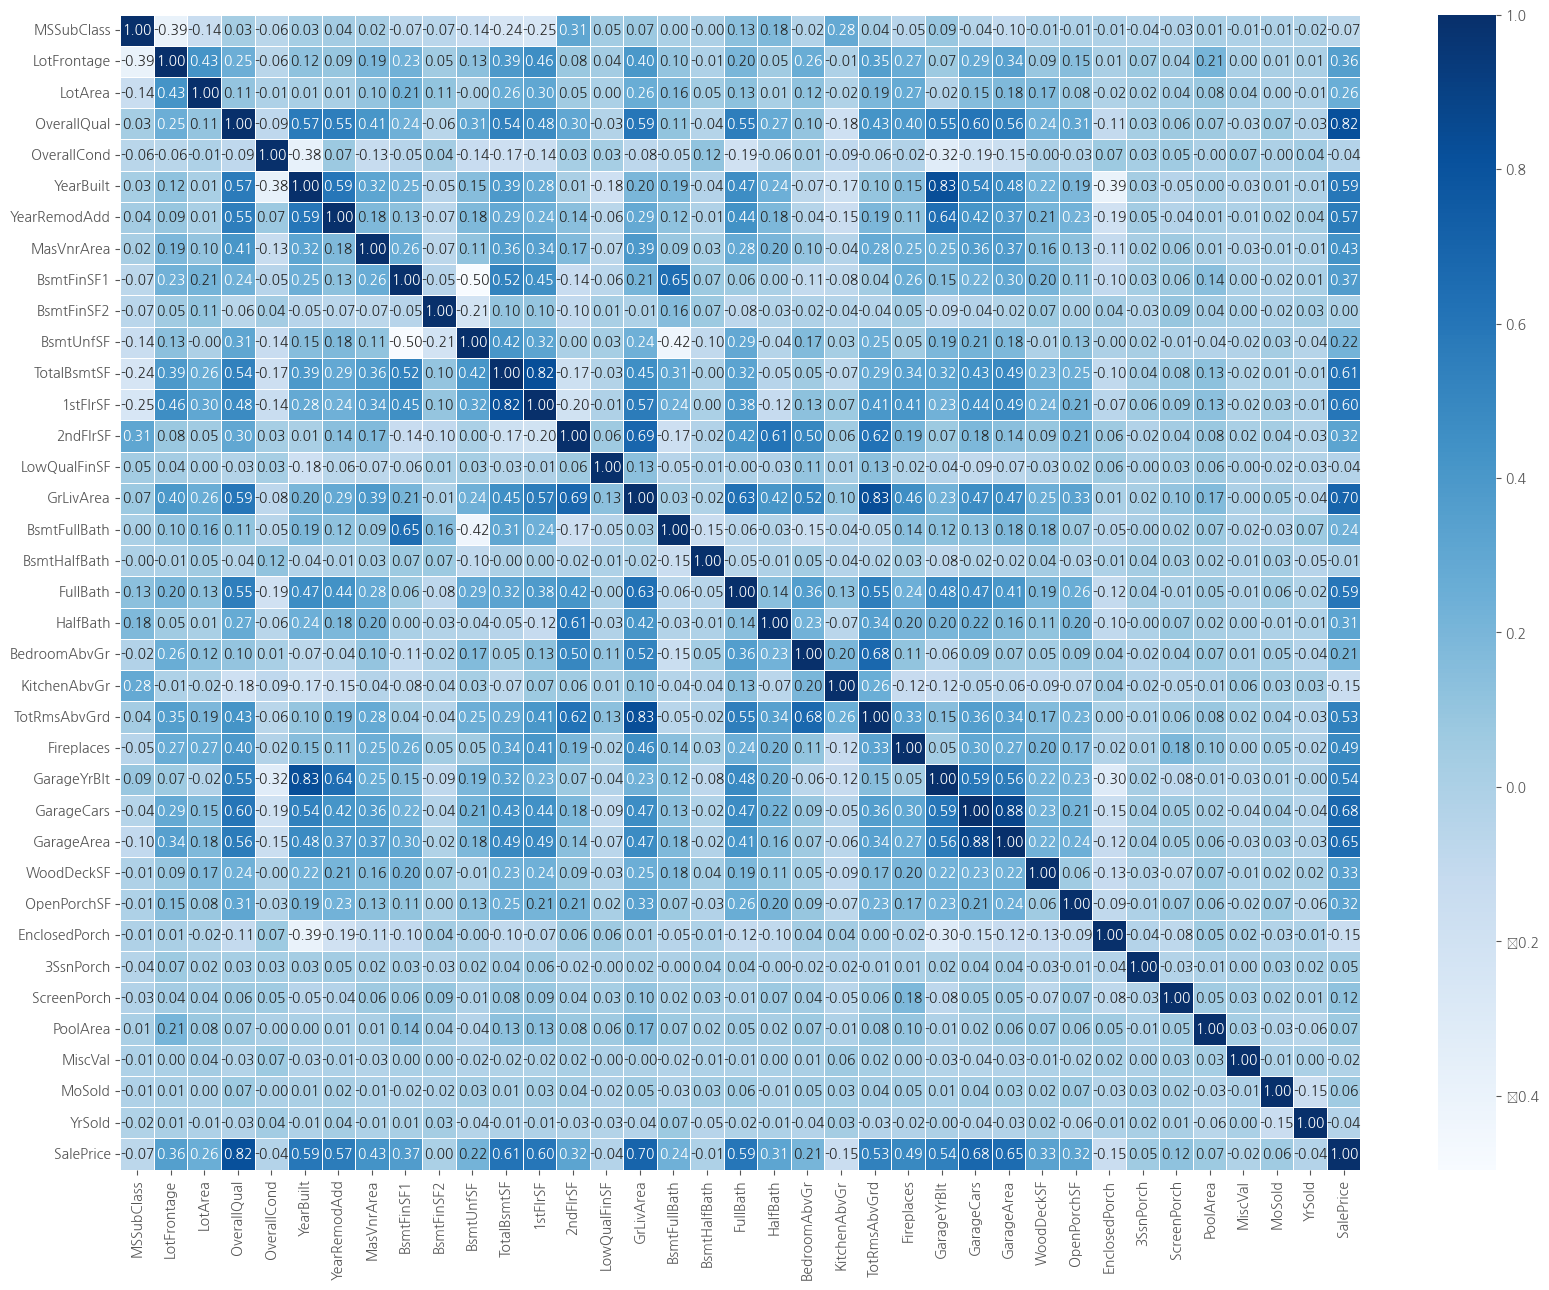

In [ ]:
numeric = train.select_dtypes(include=['number'])

# 숫자형 데이터들의 상관관계 계산
corr = numeric.corr()

# numeric = train.describe().columns

# # 숫자형 데이터들의 상관관계 계산
# corr = train[numeric].corr()

plt.figure(figsize=(20,15))
sns.heatmap(data =corr, annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

- 상태

In [ ]:
features[['OverallQual','OverallCond']]

,OverallQual,OverallCond
0,7,5
1,6,8
2,7,5
3,7,5
4,8,5
...,...,...
2914,4,7
2915,4,5
2916,5,7
2917,5,5


In [ ]:
features['Overall'] = features['OverallQual'] * features['OverallCond']

- 전체 피트

In [ ]:
features[['TotalBsmtSF','1stFlrSF','2ndFlrSF']]

,TotalBsmtSF,1stFlrSF,2ndFlrSF
0,856.0,856,854
1,1262.0,1262,0
2,920.0,920,866
3,756.0,961,756
4,1145.0,1145,1053
...,...,...,...
2914,546.0,546,546
2915,546.0,546,546
2916,1224.0,1224,0
2917,912.0,970,0


In [ ]:
features['TotalSF'] = features['TotalBsmtSF']+features['1stFlrSF']+features['2ndFlrSF']

- 욕실

In [ ]:
features[['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath']]

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
0,1.0,0.0,2,1
1,0.0,1.0,2,0
2,1.0,0.0,2,1
3,1.0,0.0,1,0
4,1.0,0.0,2,1
...,...,...,...,...
2914,0.0,0.0,1,1
2915,0.0,0.0,1,1
2916,1.0,0.0,1,0
2917,0.0,1.0,1,0


In [ ]:
features['Bath'] = features['BsmtFullBath']+features['BsmtHalfBath']+features['FullBath']+features['HalfBath']

- 방

In [ ]:
features[['BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd']]

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd
0,3,1,8
1,3,1,6
2,3,1,6
3,3,1,7
4,4,1,9
...,...,...,...
2914,3,1,5
2915,3,1,6
2916,4,1,7
2917,3,1,6


In [ ]:
features['Room'] = features['TotRmsAbvGrd'] - features['KitchenAbvGr'] - features['BedroomAbvGr']

- 현관

In [ ]:
features[['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']]

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
0,0,61,0,0,0
1,298,0,0,0,0
2,0,42,0,0,0
3,0,35,272,0,0
4,192,84,0,0,0
...,...,...,...,...,...
2914,0,0,0,0,0
2915,0,24,0,0,0
2916,474,0,0,0,0
2917,80,32,0,0,0


In [ ]:
features['Total_porch'] = features['WoodDeckSF'] + features['OpenPorchSF'] + features['EnclosedPorch'] + features['3SsnPorch'] + features['ScreenPorch']

- 건축 및 리모델링

In [ ]:
features[['YearBuilt', 'YearRemodAdd']]

,YearBuilt,YearRemodAdd
0,2003,2003
1,1976,1976
2,2001,2002
3,1915,1970
4,2000,2000
...,...,...
2914,1970,1970
2915,1970,1970
2916,1960,1996
2917,1992,1992


In [ ]:
features['YearDiffer'] = features['YearRemodAdd'] - features['YearBuilt']
features['YearSum'] = features['YearRemodAdd'] + features['YearBuilt']

#### 숫자형 데이터 제거

순서형이거나 오브젝트는 제외

In [ ]:
# 상관계수 0.05미만

features = features.drop(['3SsnPorch', 'MiscVal', 'BsmtFinSF2','BsmtFullBath','LowQualFinSF'], axis=1)

## 더미 변수

다중공선성 방지 위해 첫번째 열 제외

In [ ]:
features = pd.get_dummies(features, drop_first=True)

## 분리 및 이상치 제거

In [ ]:
train = pd.concat([features.iloc[:len(train)],train[['SalePrice']]], axis=1)
test = features.iloc[len(train):]

In [ ]:
train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,ScreenPorch,PoolArea,Overall,TotalSF,Bath,Room,Total_porch,YearDiffer,YearSum,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.176370,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,567.240411,1057.429452,...,15.060959,2.758904,33.864384,2567.048630,2.430822,2.604795,181.329452,13.597945,3956.133562,12.024057
std,22.433457,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,441.866955,438.705324,...,55.757415,40.177307,9.219624,821.714421,0.922647,1.203993,156.656097,24.476465,45.582882,0.399449
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,334.000000,1.000000,0.000000,0.000000,0.000000,3830.000000,10.460271
25%,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,30.000000,2009.500000,2.000000,2.000000,45.000000,0.000000,3922.000000,11.775105
50%,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,477.500000,991.500000,...,0.000000,0.000000,35.000000,2474.000000,2.000000,2.000000,164.000000,0.000000,3955.000000,12.001512
75%,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,808.000000,1298.250000,...,0.000000,0.000000,40.000000,3004.000000,3.000000,3.000000,266.000000,20.000000,4001.250000,12.273736
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,2336.000000,6110.000000,...,480.000000,738.000000,90.000000,11752.000000,6.000000,8.000000,1027.000000,123.000000,4020.000000,13.534474


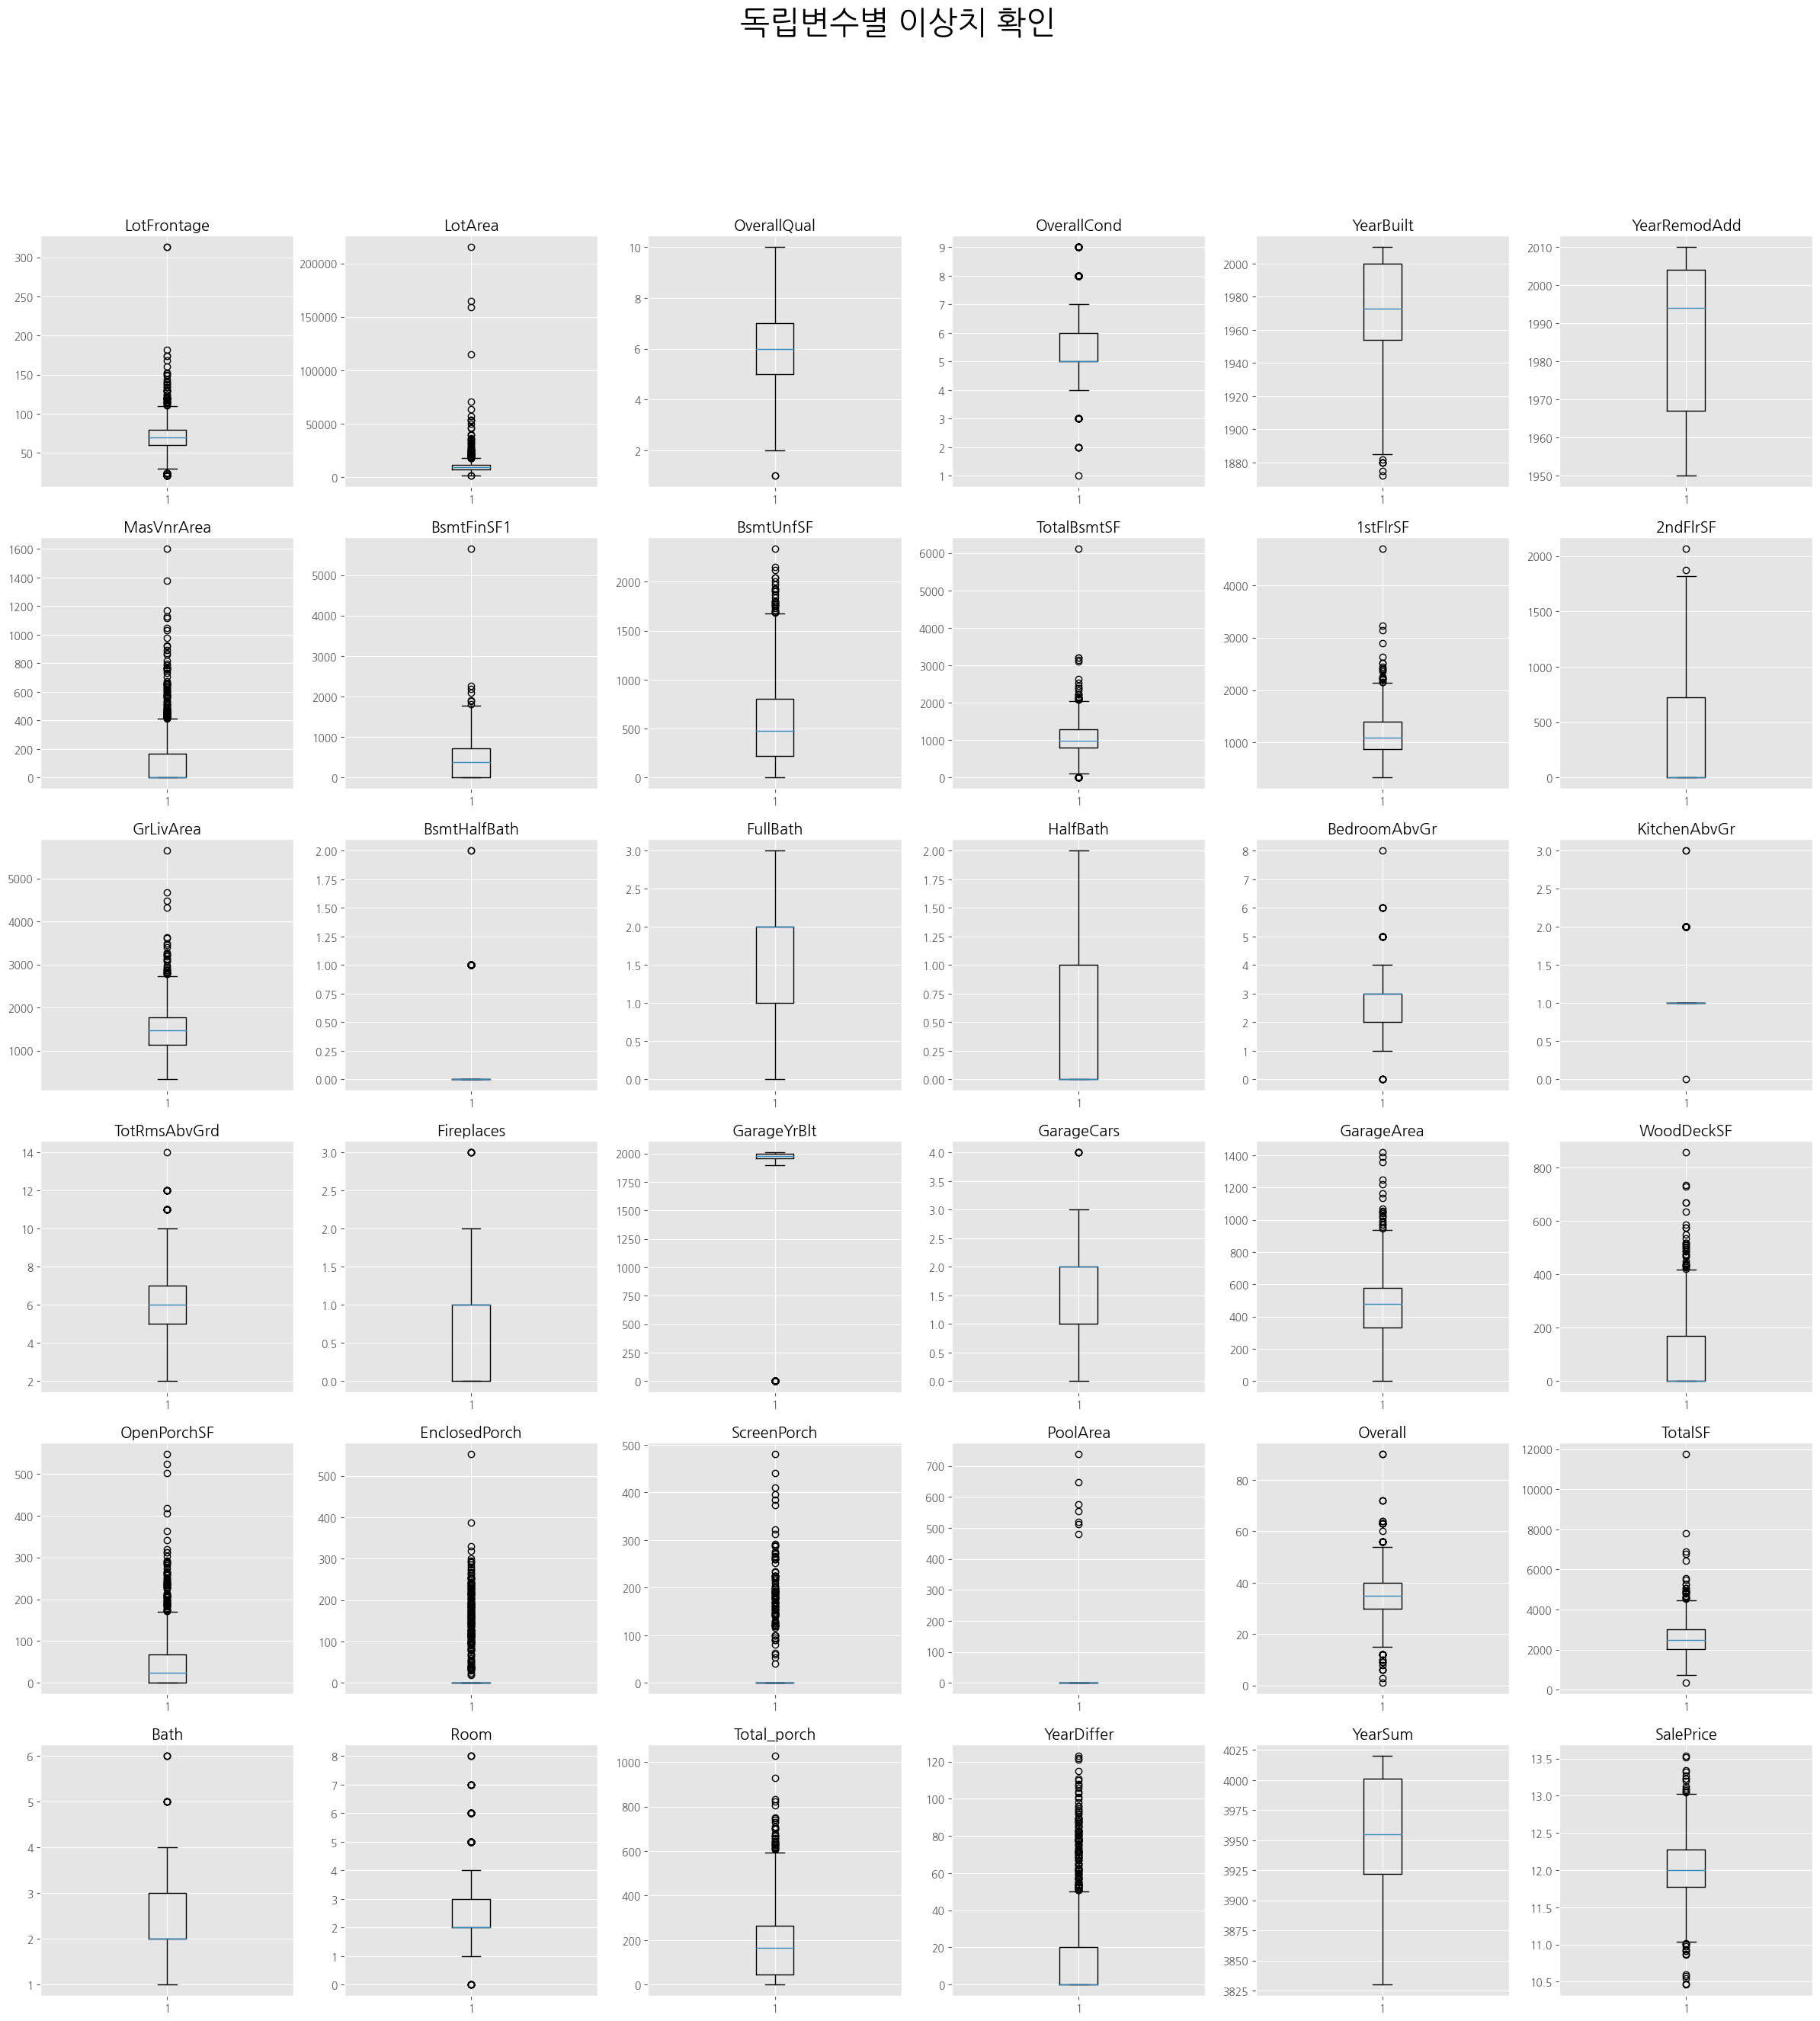

In [ ]:
plt.style.use("ggplot")

# 숫자형
feature = train.describe().columns

plt.figure(figsize=(30,30))
plt.suptitle("독립변수별 이상치 확인", fontsize = 30)


for i in range(len(feature)):
  plt.subplot(6,6,i+1)
  plt.title(feature[i])
  plt.boxplot(train[feature[i]])
plt.show()

In [ ]:
train.describe().columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'Overall',
       'TotalSF', 'Bath', 'Room', 'Total_porch', 'YearDiffer', 'YearSum',
       'SalePrice'],
      dtype='object')

In [ ]:
k = train.describe().columns

for i in k:
    # IQR 계산
    Q1 = np.percentile(train[i], 25)
    Q3 = np.percentile(train[i], 75)
    IQR = Q3 - Q1

    # 이상치 기준
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    if (len(train[i][(train[i] < lower_bound) & (train[i] > upper_bound)]))>0:
        print(i)
        print(train[i][(train[i] < lower_bound) & (train[i] > upper_bound)])

# 이상치 없음

- 과적합 유발할 수 있는 열 제거

In [ ]:
overfit = []
for i in train.columns:
    counts = train[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(train)*100 > 99: #  값의 빈도가 전체 데이터의 99%를 초과
        overfit.append(i)

print(overfit)

['PoolArea', 'MSSubClass_150', 'MSSubClass_180', 'MSSubClass_40', 'MSSubClass_45', 'LotShape_IR3', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_NPkVill', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_RRAe', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_CBlock', 'Exterior2nd_ImStucc', 'Exterior2nd_Other', 'Exterior2nd_Stone', 'ExterQual_Fa', 'ExterCond_Po', 'Foundation_Stone', 'Foundation_Wood', 'BsmtCond_Po', 'BsmtFinType2_GLQ', 'Heating_Grav', 'Heating_OthW', 

In [ ]:
train = train.drop(overfit, axis=1)
test = test.drop(overfit, axis=1)

## 모델링

### 그리드서치

In [ ]:
from sklearn.model_selection import GridSearchCV

# GradientBoostingRegressor
gbr_param_grid = {
    'n_estimators': [500, 1000, 3000],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6],
    'min_samples_split': [5,10],
    'min_samples_leaf': [5,10]
}

# RandomForestRegressor
rfr_param_grid = {
    'n_estimators': [500, 1000, 3000],
    'max_depth': [None, 5, 10],
    'min_samples_split': [5,10],
    'min_samples_leaf': [5,10]
}

# XGBRegressor
xgb_param_grid = {
    'n_estimators': [500, 1000, 3000],
    'learning_rate': [0.03, 0.3],
    'max_depth': [4,6,8],
    'min_child_weight': [0,1]
}

# LGBMRegressor
lgbm_param_grid = {
    'n_estimators': [500, 1000, 3000],
    'learning_rate': [0.01, 0.1],
    'num_leaves': [10,30]
}

In [ ]:
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

Grid_gbr = GradientBoostingRegressor()
Grid_gbr2 = GridSearchCV(estimator=Grid_gbr, param_grid=gbr_param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=1)
Grid_gbr2.fit(X,y)
print(f"Grid_gbr Best Param: {Grid_gbr2.best_params_}")

Grid_rfr = RandomForestRegressor()
Grid_rfr2 = GridSearchCV(estimator=Grid_rfr, param_grid=rfr_param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=1)
Grid_rfr2.fit(X,y)
print(f"Grid_rfr Best Param: {Grid_rfr2.best_params_}")

Grid_xgb = XGBRegressor()
Grid_xgb2 = GridSearchCV(estimator=Grid_xgb, param_grid=xgb_param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=1)
Grid_xgb2.fit(X,y)
print(f"Grid_xgb Best Param: {Grid_xgb2.best_params_}")

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Grid_gbr Best Param: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 3000}
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Grid_rfr Best Param: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 1000}
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Grid_xgb Best Param: {'learning_rate': 0.03, 'max_depth': 4, 'min_child_weight': 0, 'n_estimators': 500}


In [ ]:
Grid_lgb = LGBMRegressor()
Grid_lgb2 = GridSearchCV(estimator=Grid_lgb, param_grid=lgbm_param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=1)
Grid_lgb2.fit(X,y)
print(f"Grid_lgb Best Param: {Grid_lgb2.best_params_}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4139
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 196
[LightGBM] [Info] Start training from score 12.024057
Grid_lgb Best Param: {'learning_rate': 0.01, 'n_estimators': 1000, 'num_leaves': 10}


In [ ]:
gbr = GradientBoostingRegressor(learning_rate = 0.01, max_depth = 3, min_samples_leaf = 5, min_samples_split = 10, n_estimators = 3000)

rfr = RandomForestRegressor(max_depth = None, min_samples_leaf = 5, min_samples_split = 5, n_estimators = 1000)

xgb = XGBRegressor(learning_rate = 0.03, max_depth = 4, min_child_weight = 0, n_estimators = 500)

lr = LinearRegression()

lgb = LGBMRegressor(learning_rate = 0.01, n_estimators = 1000, num_leaves = 10)

### 스태킹

K-Fold Cross Validation: 모델의 일반화 능력을 향상시키기 위해 데이터를 k개의 부분으로 나누고, k-1개의 부분으로 모델을 학습시킨 후, 나머지 부분으로 모델을 검증합니다. 이 과정을 k번 반복

스태킹은 여러 다른 모델(regressors)의 예측을 결합하여 최종 예측을 개선하는 앙상블 기법 중 하나입니다. 이 방법에서는, 첫 번째 레벨의 모델들이 데이터에 대한 예측을 수행하고, 그 예측 결과를 기반으로 두 번째 레벨의 메타 모델(meta_regressor)이 최종 예측을 수행

cross_val_score 함수 사용: cross_val_score는 지정된 모델에 대해 교차 검증을 수행하고 각 분할에 대한 점수를 반환합니다. 이 경우, scoring 파라미터로 "neg_mean_squared_error"를 사용하는데, 이는 평균 제곱 오차(Mean Squared Error, MSE)의 음수 값을 반환합니다. 교차 검증에서는 높은 점수가 더 좋은 성능을 의미하는데, MSE는 낮을수록 좋으므로 음수를 사용하여 이를 교차 검증 점수로 적용할 수 있게 합니다.

음수 MSE 값 처리: "neg_mean_squared_error"로 인해 반환된 값은 음수입니다. MSE는 항상 양수이므로, 음수 값을 양수로 변환하기 위해 앞에 -를 붙여줍니다. 이렇게 양수로 변환된 값은 실제 MSE 값과 동일합니다.

RMSE 계산: RMSE(Root Mean Squared Error)는 MSE의 제곱근을 취한 값입니다. RMSE는 오차의 크기를 원래 데이터의 단위와 동일하게 해주어 해석을 용이하게 합니다. 따라서, MSE 값에 np.sqrt (NumPy의 제곱근 함수)를 적용하여 RMSE를 계산합니다.

In [ ]:
from mlxtend.regressor import StackingCVRegressor

stack = StackingCVRegressor(regressors=(gbr, rfr, xgb, lr, lgb),
                                meta_regressor=gbr,
                                use_features_in_secondary=True)

kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [ ]:
# 모델에 대한 RMSE 점수 계산

score = cv_rmse(gbr)
print(f"Gradient Boosting Regressor의 CV RMSE 점수: {score.mean()} (±{score.std()})")

score = cv_rmse(rfr)
print(f"RandomForestRegressor의 CV RMSE 점수: {score.mean()} (±{score.std()})")

score = cv_rmse(xgb)
print(f"XGBRegressor의 CV RMSE 점수: {score.mean()} (±{score.std()})")

score = cv_rmse(lr)
print(f"LinearRegression의 CV RMSE 점수: {score.mean()} (±{score.std()})")

score = cv_rmse(lgb)
print(f"LGBMRegressor의 CV RMSE 점수: {score.mean()} (±{score.std()})")

Gradient Boosting Regressor의 CV RMSE 점수: 0.12474771239865767 (±0.02146951683521616)
RandomForestRegressor의 CV RMSE 점수: 0.1390381409987062 (±0.0246809797855042)
XGBRegressor의 CV RMSE 점수: 0.1268217133191866 (±0.019889384595957006)
LinearRegression의 CV RMSE 점수: 0.13945803742816318 (±0.03315972125967303)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4049
[LightGBM] [Info] Number of data points in the train set: 1314, number of used features: 193
[LightGBM] [Info] Start training from score 12.025324
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001626 seconds.
You can set `force_row_wise

In [ ]:
print('stack')
stack_model = stack.fit(np.array(X), np.array(y))

print('gbr')
gbr_data = gbr.fit(X, y)

print('rfr')
rfr_data = rfr.fit(X, y)

print('xgb')
xgb_data = xgb.fit(X, y)

print('lr')
lr_data = lr.fit(X, y)

print('lgb')
lgb_data = lgb.fit(X, y)

stack
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3854
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 186
[LightGBM] [Info] Start training from score 12.025859
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3870
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 191
[LightGBM] [Info] Start training from score 12.022110
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is n

### 블렌딩

In [ ]:
def blend_models_predict(X):
    return ((0.2 * gbr_data.predict(X)) + \
            (0.06 * rfr_data.predict(X)) + \
            (0.15 * xgb_data.predict(X)) + \
            (0.04 * lr_data.predict(X)) + \
            (0.15 * lgb_data.predict(X)) + \
            (0.4 * stack_model.predict(np.array(X))))

In [ ]:
print(rmse(y, blend_models_predict(X)))

0.058259734060433256


### 예측

In [ ]:
prediction = blend_models_predict(test)
y_pred = np.exp(prediction)

In [ ]:
y_pred

array([127545.36851038, 161693.32575017, 176179.34386647, ...,
       160228.53849285, 117246.22150468, 221781.26232366])

In [ ]:
submission['SalePrice'] = y_pred
submission

,Id,SalePrice
0,1461,127545.368510
1,1462,161693.325750
2,1463,176179.343866
3,1464,195195.488133
4,1465,189509.688028
...,...,...
1454,2915,83788.164898
1455,2916,84335.812272
1456,2917,160228.538493
1457,2918,117246.221505


In [ ]:
submission.to_csv('submission.csv',index = False)